In [ ]:
import torch

In [ ]:
from haloidp_analysis import *

In [ ]:
tien_halo_params = [220.0,232,544,0.4e9]

In [ ]:
# import sys
# sys.path.append('../QCDark/')
# from QCDark import QCDark
# QC = QCDark()
# import numpy as np
# from QCDark import form_factor
# ionization_model = 'R'
# SI = form_factor('Si_final.hdf5')
# ionization_parameter = 'p100k.dat'
# # mX_array = np.concatenate((np.arange(0.2,0.8,0.025),np.array([0.9]),np.arange(1,5,0.05),np.arange(5,11,1),np.array([20,50,100,200,500,1000,10000])))*1e6
# crosssection = 1e-36
# from QCDark import QCDark
# QC = QCDark()
# halo_model = 'imb'

# results = QC.calculate_rates([10], SI, ionization_model, ionization_parameter, halo_model,FDM_exp = 0, max_num_electrons = 1, sigmae = crosssection, DoScreen = True, saveData = False)
# results

In [ ]:
from QEDark3 import QEDark
device = 'cuda'
# [220e5,232e5,544e5,0.4e9]
QE_test = QEDark()
QE_test.change_to_step()
QE_test.update_params(220,232,544,0.4e9,1e-37)
QE_test.optimize(device)
test_mass = 10
nes = [1,2,3,4,5,6,7,8,9,10]
FDMn_test = 0
halo_model_test = 'imb'
rates_shm_10MeV_FDM0_Si = QE_test.vectorized_dRdnE('Si',test_mass,nes,FDMn_test,halo_model_test,DoScreen=False,isoangle=None,halo_id_params=None)
rates_shm_10MeV_FDM0_Ge = QE_test.vectorized_dRdnE("Ge",test_mass,nes,FDMn_test,halo_model_test,DoScreen=False,isoangle=None,halo_id_params=None)

from haloidp_analysis import minimize,profile_likelihood
FDMn = 0
num_steps = 100
# test_params_1MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_10MeV_AdamW = torch.rand(num_steps,dtype=torch.double,device=device)
test_params_10MeV_Adam = torch.rand(num_steps,dtype=torch.float,device=device)
# test_params_10MeV_RMSPROP = torch.rand(num_steps,dtype=torch.double,device=device)
# test_params_10MeV_Adam_test = torch.rand(num_steps,dtype=torch.double,device=device)

# test_params_20MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_100MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# print('Initial Params',test_params_10MeV)
materials = ['Si','Ge']
n_obs_m = [rates_shm_10MeV_FDM0_Si,rates_shm_10MeV_FDM0_Ge]
# params_1MeV,likeilhoods_1MeV,test_stats_1MeV =  minimize(1,FDMn,n_obs_m,materials,profile_likelihood, test_params_1MeV,epochs=2000,lr=0.01,crosssection=1e-36,device=device)
params_10MeV_Adam,likeilhoods_10MeV_Adam,test_stats_10MeV_Adam =  minimize(10,FDMn,n_obs_m,materials,profile_likelihood, test_params_10MeV_Adam,epochs=5000,lr=0.01,device=device,optimizer_algorithm='Adam',adaptive=True)
# params_10MeV_Adam_test,likeilhoods_10MeV_Adam_test,test_stats_10MeV_Adam_test =  minimize(10,FDMn,n_obs_m,materials,profile_likelihood, test_params_10MeV_Adam_test,epochs=3000,lr=0.01,device=device,optimizer_algorithm='Adam',param_dep_test=True)

# params_20MeV,likeilhoods_20MeV,test_stats_20MeV =  minimize(20,FDMn,n_obs_m,materials,profile_likelihood, test_params_20MeV,epochs=2000,lr=0.01,crosssection=1e-36,device=test_params_20MeV.device)
# params_100MeV,likeilhoods_100MeV,test_stats_100MeV =  minimize(20,FDMn,n_obs_m,materials,profile_likelihood, test_params_100MeV,epochs=2000,lr=0.01,crosssection=1e-36,device=device)

# print('Final Params',params_10MeV_Adam)


In [ ]:
from haloidp_analysis import plot_eta
plot_eta(10,params_10MeV_Adam,plot_mb =True,device=device,save=False,plotname=None,dir='./',cross_section = 1e-37,halo_params = [220.0,232,544,0.4e9])

# plot_eta(10,params_10MeV_Adam_test,plot_mb =True,device=device,save=False,plotname=None,dir='./',cross_section = 1e-36)

In [ ]:
#this is me testing on my own model where I know the answer to make sure it is converging
#see if likelihood function has rough shape as expected
#custom rates I generated to check
import numpy as np
import torch
import matplotlib.pyplot as plt
from QEDark3 import QEDark
device = 'cuda'
# [220e5,232e5,544e5,0.4e9]
QE_test = QEDark()
QE_test.change_to_step()
QE_test.update_params(220,232,544,0.4e9,1e-37)
QE_test.optimize(device)
test_mass = 50
nes = [1,2,3,4,5,6,7,8,9,10]
FDMn_test = 2
halo_model_test = 'imb'
rates_shm_50MeV_FDM0_Si = QE_test.vectorized_dRdnE('Si',test_mass,nes,FDMn_test,halo_model_test,DoScreen=False,isoangle=None,halo_id_params=None,forceCalculate=True)
rates_shm_50MeV_FDM0_Ge = QE_test.vectorized_dRdnE("Ge",test_mass,nes,FDMn_test,halo_model_test,DoScreen=False,isoangle=None,halo_id_params=None,forceCalculate=True)



from haloidp_analysis import minimize,profile_likelihood
FDMn = 2
num_steps = 100
# test_params_1MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_10MeV_AdamW = torch.rand(num_steps,dtype=torch.double,device=device)
test_params_50MeV_Adam = torch.rand(num_steps,dtype=torch.float,device=device)
# test_params_10MeV_RMSPROP = torch.rand(num_steps,dtype=torch.double,device=device)
# test_params_10MeV_Adam_test = torch.rand(num_steps,dtype=torch.double,device=device)

# test_params_20MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_100MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# print('Initial Params',test_params_10MeV)
materials = ['Si','Ge']
n_obs_m = [rates_shm_50MeV_FDM0_Si,rates_shm_50MeV_FDM0_Ge]
# params_1MeV,likeilhoods_1MeV,test_stats_1MeV =  minimize(1,FDMn,n_obs_m,materials,profile_likelihood, test_params_1MeV,epochs=2000,lr=0.01,crosssection=1e-36,device=device)
params_50MeV_Adam,likeilhoods_50MeV_Adam,test_stats_50MeV_Adam =  minimize(50,FDMn,n_obs_m,materials,profile_likelihood, test_params_50MeV_Adam,epochs=5000,lr=0.01,device=device,optimizer_algorithm='Adam',adaptive=True)
# params_10MeV_Adam_test,likeilhoods_10MeV_Adam_test,test_stats_10MeV_Adam_test =  minimize(10,FDMn,n_obs_m,materials,profile_likelihood, test_params_10MeV_Adam_test,epochs=3000,lr=0.01,device=device,optimizer_algorithm='Adam',param_dep_test=True)

# params_20MeV,likeilhoods_20MeV,test_stats_20MeV =  minimize(20,FDMn,n_obs_m,materials,profile_likelihood, test_params_20MeV,epochs=2000,lr=0.01,crosssection=1e-36,device=test_params_20MeV.device)
# params_100MeV,likeilhoods_100MeV,test_stats_100MeV =  minimize(20,FDMn,n_obs_m,materials,profile_likelihood, test_params_100MeV,epochs=2000,lr=0.01,crosssection=1e-36,device=device)

# print('Final Params',params_10MeV_Adam)


In [ ]:
from haloidp_analysis import plot_eta
plot_eta(50,params_50MeV_Adam,plot_mb =True,device=device,save=False,plotname=None,dir='./',cross_section = 1e-37,halo_params = [220.0,232,544,0.4e9],norm=1e-15)

# plot_eta(10,params_10MeV_Adam_test,plot_mb =True,device=device,save=False,plotname=None,dir='./',cross_section = 1e-36)

In [ ]:
device = 'cuda'
if device == 'mps':
    type_torch = torch.float
else:
    type_torch = torch.double
modelnumber = 1
fpath_si = f'./halo_independent/1kgyr_fake_data/Model{modelnumber}_Si.csv'

from numpy import loadtxt as loadtxt
fake_data_si = loadtxt(fpath_si,delimiter=',')
rates_si = fake_data_si[:,1]
rates_si = torch.from_numpy(rates_si)
if device == 'mps':
    rates_si = rates_si.float()
rates_si = rates_si.to(device)
fpath_ge = f'./halo_independent/1kgyr_fake_data/Model{modelnumber}_Ge.csv'
fake_data_ge = loadtxt(fpath_ge,delimiter=',')
rates_ge = fake_data_ge[:,1]
rates_ge = torch.from_numpy(rates_ge)
if device == 'mps':
    rates_ge = rates_ge.float()
rates_ge = rates_ge.to(device)
model_rates = [rates_si,rates_ge]


FDMn = 2
from haloidp_analysis import minimize,profile_likelihood
num_steps = 100
# test_params_1MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_10MeV_AdamW = torch.rand(num_steps,dtype=torch.double,device=device)
model1_params_50MeV_Adam = torch.rand(num_steps,dtype=type_torch,device=device)

# test_params_20MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_100MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# print('Initial Params',test_params_10MeV)
materials = ['Si','Ge']
params_50MeV_model1,likeilhoods_50MeV_model1,test_stats_50MeV_model1 =  minimize(50,FDMn,model_rates,materials,profile_likelihood, model1_params_50MeV_Adam,epochs=5000,lr=0.01,device=device,optimizer_algorithm='Adam',adaptive=True)

In [ ]:
plot_eta(50,params_50MeV_model1,plot_mb =True,device=device,save=False,plotname=None,dir='./',cross_section = 1e-37,halo_params = [220.0,232,544,0.4e9],norm=1e-15)

# plot_eta(10,params_10MeV_Adam_test,plot_mb =True,device=device,save=False,plotname=None,dir='./',cross_section = 1e-36)
test_stats_50MeV_model1

In [ ]:
device = 'cuda'
if device == 'mps':
    type_torch = torch.float
else:
    type_torch = torch.double
modelnumber = 1
fpath_si = f'./halo_independent/1kgyr_fake_data/Model{modelnumber}_Si.csv'

from numpy import loadtxt as loadtxt
fake_data_si = loadtxt(fpath_si,delimiter=',')
rates_si = fake_data_si[:,1]
rates_si = torch.from_numpy(rates_si)
if device == 'mps':
    rates_si = rates_si.float()
rates_si = rates_si.to(device)
fpath_ge = f'./halo_independent/1kgyr_fake_data/Model{modelnumber}_Ge.csv'
fake_data_ge = loadtxt(fpath_ge,delimiter=',')
rates_ge = fake_data_ge[:,1]
rates_ge = torch.from_numpy(rates_ge)
if device == 'mps':
    rates_ge = rates_ge.float()
rates_ge = rates_ge.to(device)
model_rates = [rates_si,rates_ge]


FDMn = 2
from haloidp_analysis import minimize,profile_likelihood
num_steps = 100
# test_params_1MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_10MeV_AdamW = torch.rand(num_steps,dtype=torch.double,device=device)
model1_params_50MeV_Adam_wrong_testing = torch.rand(num_steps,dtype=type_torch,device=device)

# test_params_20MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_100MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# print('Initial Params',test_params_10MeV)
materials = ['Si','Ge']
params_50MeV_model1_Si,likeilhoods_50MeV_model1_Si,test_stats_50MeV_model1_Si =  minimize(55,FDMn,model_rates,materials,profile_likelihood, model1_params_50MeV_Adam_wrong_testing,epochs=5000,lr=0.01,device=device,optimizer_algorithm='Adam',adaptive=True)

In [ ]:
params_50MeV_model1_Si

In [ ]:
plot_eta(55,params_50MeV_model1_Si,plot_mb =True,device=device,save=False,plotname=None,dir='./',cross_section = 1e-37,halo_params = [220.0,232,544,0.4e9],norm=1e-15)

# plot_eta(10,params_10MeV_Adam_test,plot_mb =True,device=device,save=False,plotname=None,dir='./',cross_section = 1e-36)
test_stats_50MeV_model1_Si

In [ ]:
import pickle
with open(f'./halo_independent/halo_idp_results/{'model1_cuda.pickle'}','rb') as dbfile:
    data = pickle.load(dbfile)

likelihood_fdm0 = []
test_stats_fdm0 = []
likelihood_fdm2 = []
test_stats_fdm2 = []
params_fdm0 = []
params_fdm2 = []
dm_masses = list(data[0].keys())
print(dm_masses)

for mX in dm_masses:
    likelihood0 = data[0][mX]['likelihoods']
    likelihood2 = data[2][mX]['likelihoods']
    likelihood_fdm0.append(likelihood0)
    likelihood_fdm2.append(likelihood2)

    teststats0 = data[0][mX]['test_statistics']
    teststats2 = data[2][mX]['test_statistics']
    test_stats_fdm0.append(teststats0)
    test_stats_fdm2.append(teststats2)

    params0 = data[0][mX]['params']
    params2 = data[2][mX]['params']
    params_fdm0.append(params0)
    params_fdm2.append(params2)
t = data[2][50]['params']


In [ ]:
plot_eta(50,t,plot_mb =True,device=t.device,save=False,plotname='testing',dir='./',cross_section=1e-37,halo_params=tien_halo_params,norm=1e-15)


In [ ]:
# device = 'cuda'
# if device == 'mps':
#     type_torch = torch.float
# else:
#     type_torch = torch.double
# modelnumber = 1
# fpath_si = f'./halo_independent/1kgyr_fake_data/Model{modelnumber}_Si.csv'

# from numpy import loadtxt as loadtxt
# fake_data_si = loadtxt(fpath_si,delimiter=',')
# rates_si = fake_data_si[:,1]
# rates_si = torch.from_numpy(rates_si)
# if device == 'mps':
#     rates_si = rates_si.float()
# rates_si = rates_si.to(device)
# fpath_ge = f'./halo_independent/1kgyr_fake_data/Model{modelnumber}_Ge.csv'
# fake_data_ge = loadtxt(fpath_ge,delimiter=',')
# rates_ge = fake_data_ge[:,1]
# rates_ge = torch.from_numpy(rates_ge)
# if device == 'mps':
#     rates_ge = rates_ge.float()
# rates_ge = rates_ge.to(device)
# model_rates = [rates_si,rates_ge]


# FDMn = 2
# from haloidp_analysis import minimize,profile_likelihood
# num_steps = 100
# # test_params_1MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# # test_params_10MeV_AdamW = torch.rand(num_steps,dtype=torch.double,device=device)
# model1_params_50MeV_Adam_Ge = torch.rand(num_steps,dtype=type_torch,device=device)

# # test_params_20MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# # test_params_100MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# # print('Initial Params',test_params_10MeV)
# materials = ['Si','Ge']
# params_50MeV_model1_Ge,likeilhoods_50MeV_model1_Ge,test_stats_50MeV_model1_Ge =  minimize(50,FDMn,[rates_ge],['Ge'],profile_likelihood, model1_params_50MeV_Adam_Ge,epochs=10000,lr=0.001,device=device,optimizer_algorithm='Adam',adaptive=True)

In [ ]:
# plot_eta(50,params_50MeV_model1_Ge,plot_mb =True,device=device,save=False,plotname=None,dir='./',cross_section = 1e-37,halo_params = [220.0,232,544,0.4e9])


In [ ]:
# import torch
# torch.concatenate((torch.arange(10,100,step=5),torch.arange(100,1100,step=100)))

In [ ]:
# from haloidp_analysis import mock_data_scan
# data = mock_data_scan(1,'cuda',adaptive=True,mock_data_dir='1kgyr_fake_data',optimizer='Adam')

In [13]:
import torch
from tqdm.autonotebook import tqdm
device = 'cuda'
if device == 'mps':
    type_torch = torch.float
else:
    type_torch = torch.double
modelnumber = 5
fpath_si = f'./halo_independent/1kgyr_fake_data/Model{modelnumber}_Si.csv'

from numpy import loadtxt as loadtxt
fake_data_si = loadtxt(fpath_si,delimiter=',')
rates_si = fake_data_si[:,1]
rates_si = torch.from_numpy(rates_si)
if device == 'mps':
    rates_si = rates_si.float()
rates_si = rates_si.to(device)
fpath_ge = f'./halo_independent/1kgyr_fake_data/Model{modelnumber}_Ge.csv'
fake_data_ge = loadtxt(fpath_ge,delimiter=',')
rates_ge = fake_data_ge[:,1]
rates_ge = torch.from_numpy(rates_ge)
if device == 'mps':
    rates_ge = rates_ge.float()
rates_ge = rates_ge.to(device)
model_rates = [rates_si,rates_ge]


FDMn = 2
from haloidp_analysis import minimize,profile_likelihood
num_steps = 100
# test_params_1MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_10MeV_AdamW = torch.rand(num_steps,dtype=torch.double,device=device)
stuffs = []
# coarse_mX_grid = [5,10,20,30,40,50,60,70,80,90]
# coarse_mX_grid = [40,50,60]
coarse_mX_grid = torch.concatenate((torch.arange(5,100,step=5),torch.arange(100,1100,step=100))).numpy()

starting_points = []
for m in range(len(coarse_mX_grid)):
    starting_points.append(torch.rand(num_steps,dtype=type_torch,device=device))

for FDMn in [0,2]:
    stuff = []
    for m in tqdm(range(len(coarse_mX_grid))):
        mX = coarse_mX_grid[m]
        model1_params_Adam_temp = starting_points[m].detach().clone()
        model1_params_Adam_temp = model1_params_Adam_temp.to(device)
        # test_params_20MeV = torch.rand(num_steps,dtype=torch.float32,device=device)|
        # test_params_100MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
        # print('Initial Params',test_params_10MeV)
        materials = ['Si','Ge']
        params_,likeilhoods_,test_stats_ =  minimize(mX,FDMn,model_rates,materials,profile_likelihood, model1_params_Adam_temp,epochs=20000,lr=0.01,device=device,optimizer_algorithm='AdamW',adaptive=True)

        stuff.append([mX,params_,likeilhoods_,test_stats_])
    stuffs.append(stuff)

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

In [ ]:
# print(stuffs[0][0][0],stuffs[0][0][3])
# plot_eta(stuffs[0][0][0],stuffs[0][0][1],plot_mb =True,device=stuffs[0][0][1].device,save=False,plotname='testing',dir='./',cross_section=1e-37,halo_params=tien_halo_params)


5 [10.967459031855878, 30.47261902936219] 41.44007806121807
10 [13.600503382751338, 37.72437978751152] 51.324883170262865
15 [8.601684876075025, 22.62577380726693] 31.227458683341958
20 [8.993764665629909, 12.875809598348415] 21.869574263978322
25 [10.428197885236411, 9.619607377240044] 20.047805262476455
30 [6.3414373471333985, 4.654866136711366] 10.996303483844764
35 [5.652049993709233, 4.4606737724973] 10.112723766206532
40 [3.4625073677236022, 4.322464567199264] 7.784971934922866
45 [2.2627861560985485, 3.862767414827121] 6.125553570925669
50 [4.698525253897971, 6.368097598148217] 11.066622852046187
55 [5.676146459887928, 7.460376240157552] 13.136522700045479
60 [13.181504518894236, 16.386481869851494] 29.56798638874573
65 [14.536307926854843, 16.41579504886608] 30.952102975720923
70 [18.133537541816597, 17.86704280228258] 36.00058034409918
75 [24.59744970054876, 18.495783801513213] 43.09323350206198
80 [30.373691462539842, 21.41886352981735] 51.792554992357196
85 [41.7362812203785

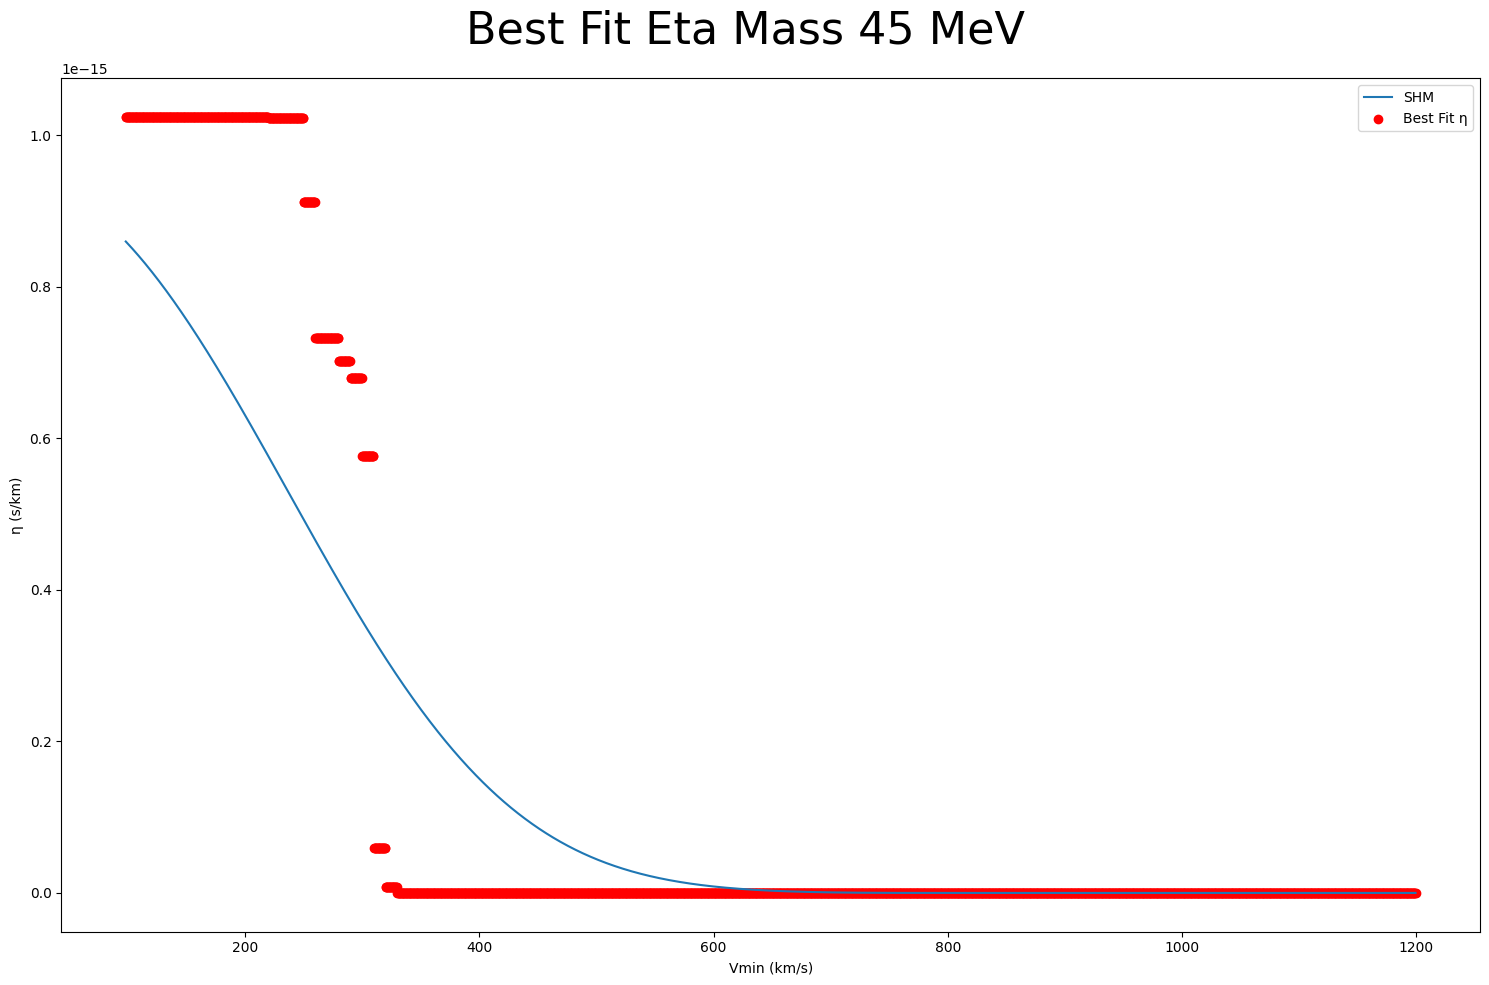

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from haloidp_analysis import plot_eta
tien_halo_params = [220.0,232,544,0.4e9]
ts = []
ts_si = []
ts_ge = []
index = 0
for i,mX in enumerate(coarse_mX_grid):
    # params = stuff[i][0]
    s = stuffs[index][i][3]
    print(mX,s,sum(s))
    ts.append(sum(s))
    ts_si.append(s[0])
    ts_ge.append(s[1])

ts = np.array(ts)
bfi = np.argmin(ts)
bfi_Si= np.argmin(ts_si)
bfi_Ge= np.argmin(ts_ge)
print(bfi)
print(f'best fit at {coarse_mX_grid[bfi]}, ts = {np.min(ts)}, si best fit at {coarse_mX_grid[bfi_Si]}, ge best fit at {coarse_mX_grid[bfi_Ge]}')
best_fit_params = stuffs[index][bfi][1]
plot_eta(coarse_mX_grid[bfi],best_fit_params,plot_mb =True,device=best_fit_params.device,save=False,plotname='testing',dir='./',cross_section=1e-37,halo_params=tien_halo_params,norm=1e-15)


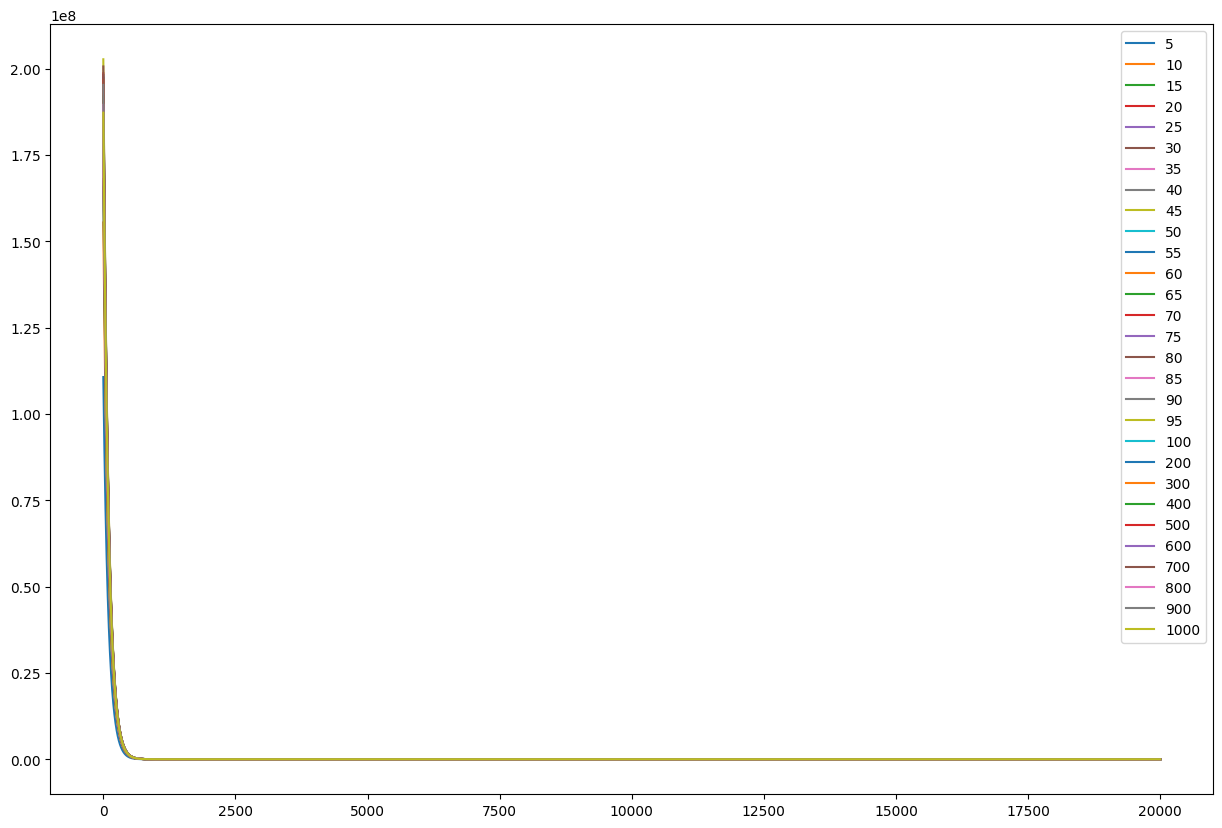

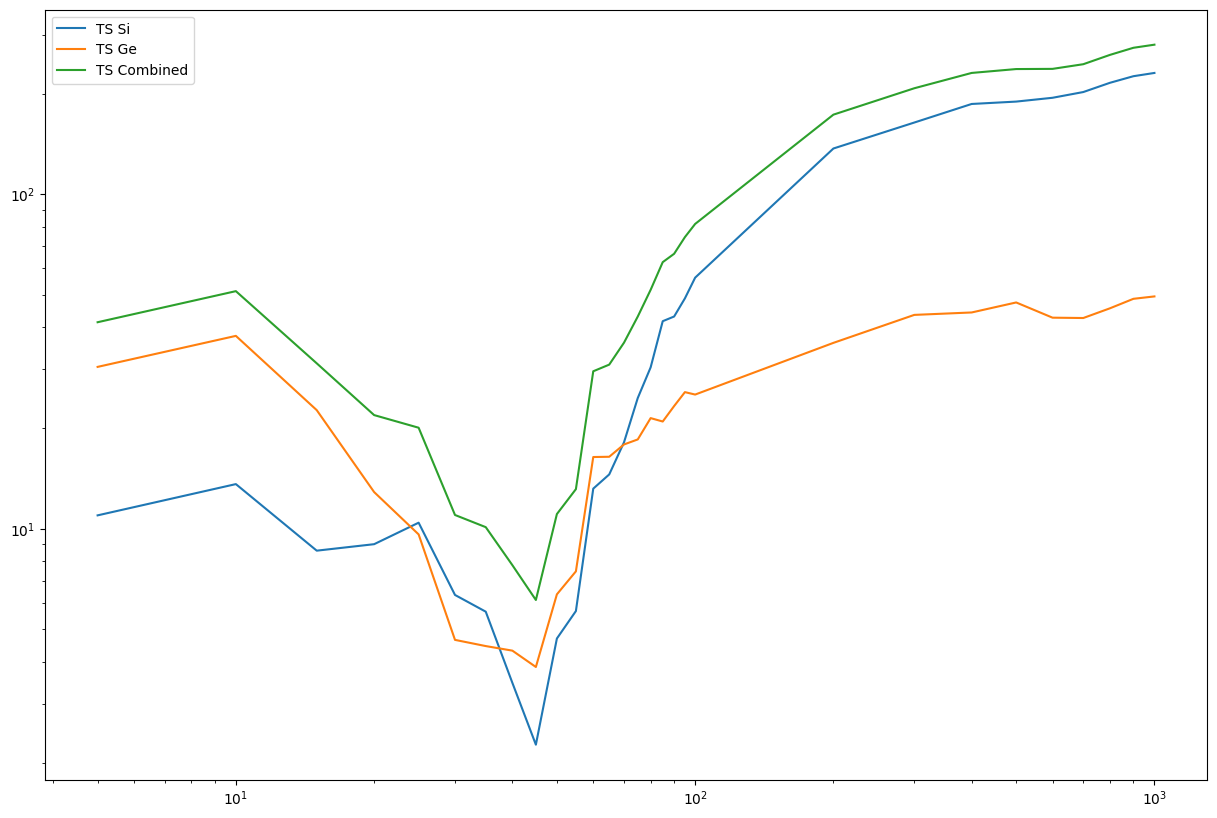

In [12]:
ts_si = []
ts_ge = []
fig, ax = plt.subplots(figsize=(15,10))
for i,mX in enumerate(coarse_mX_grid):
    # params = stuff[i][0]
    likelihood = stuffs[index][i][2]#.detach().cpu()
    ts = stuffs[index][i][3]
    ts_si.append(ts[0])
    ts_ge.append(ts[1])

    # print(likelihood.shape)
    ax.plot(likelihood,label=mX)
ax.legend()

ts_si = np.array(ts_si)
ts_ge = np.array(ts_ge)
comb =ts_si+ts_ge
fig, ax = plt.subplots(figsize=(15,10))
# for i,mX in enumerate(coarse_mX_grid):
    # params = stuff[i][0]
    # print(likelihood.shape)
ax.plot(coarse_mX_grid,ts_si,label=f"TS Si")
ax.plot(coarse_mX_grid,ts_ge,label=f"TS Ge")
ax.plot(coarse_mX_grid,comb,label=f"TS Combined")
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend()



In [ ]:
from haloidp_analysis import find_best_fit
# tien_halo_params = [220.0,232,544,0.4e9]

data = find_best_fit('model1_cuda.pickle','Model 1',plot_shm = True,zoom=False,log=False,cross_section=1e-37,onlySi=False,halo_params=tien_halo_params,save=False)

In [ ]:
import torch
device = 'cuda'
if device == 'mps':
    type_torch = torch.float
else:
    type_torch = torch.double
modelnumber = 2
fpath_si = f'./halo_independent/1kgyr_fake_data/Model{modelnumber}_Si.csv'

from numpy import loadtxt as loadtxt
fake_data_si = loadtxt(fpath_si,delimiter=',')
rates_si = fake_data_si[:,1]
rates_si = torch.from_numpy(rates_si)
if device == 'mps':
    rates_si = rates_si.float()
rates_si = rates_si.to(device)
fpath_ge = f'./halo_independent/1kgyr_fake_data/Model{modelnumber}_Ge.csv'
fake_data_ge = loadtxt(fpath_ge,delimiter=',')
rates_ge = fake_data_ge[:,1]
rates_ge = torch.from_numpy(rates_ge)
if device == 'mps':
    rates_ge = rates_ge.float()
rates_ge = rates_ge.to(device)
model_rates = [rates_si,rates_ge]


FDMn = 2
from haloidp_analysis import minimize,profile_likelihood
num_steps = 100
# test_params_1MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_10MeV_AdamW = torch.rand(num_steps,dtype=torch.double,device=device)
model1_params_50MeV_Adamh = torch.rand(num_steps,dtype=type_torch,device=device)

# test_params_20MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_100MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# print('Initial Params',test_params_10MeV)
materials = ['Si','Ge']

params_h,likeilhoods_h,test_stats_h =  minimize(100,FDMn,model_rates,materials,profile_likelihood, model1_params_50MeV_Adamh,epochs=20000,lr=0.0001,device=device,optimizer_algorithm='AdamW',adaptive=True,fused=False)

In [ ]:
test_stats_


params_h



In [ ]:
# 50 [0.5035492079568433, 0.2802761856937068] 0.7838253936505502 #from AdamW 10k steps adaptive lr = 0.001


In [ ]:
from haloidp_analysis import plot_eta
tien_halo_params = [220.0,232,544,0.4e9]

plot_eta(100,params_h,plot_mb =False,device=params_h.device,save=False,plotname='testing',dir='./',cross_section=1e-37,halo_params=tien_halo_params,norm=1e-15)


In [ ]:
import matplotlib.pyplot as plt
plt.plot(likeilhoods_)

In [ ]:
device = 'cuda'
if device == 'mps':
    type_torch = torch.float
else:
    type_torch = torch.double
modelnumber = 2
fpath_si = f'./halo_independent/1kgyr_fake_data/Model{modelnumber}_Si.csv'

from numpy import loadtxt as loadtxt
fake_data_si = loadtxt(fpath_si,delimiter=',')
rates_si = fake_data_si[:,1]
rates_si = torch.from_numpy(rates_si)
if device == 'mps':
    rates_si = rates_si.float()
rates_si = rates_si.to(device)
fpath_ge = f'./halo_independent/1kgyr_fake_data/Model{modelnumber}_Ge.csv'
fake_data_ge = loadtxt(fpath_ge,delimiter=',')
rates_ge = fake_data_ge[:,1]
rates_ge = torch.from_numpy(rates_ge)
if device == 'mps':
    rates_ge = rates_ge.float()
rates_ge = rates_ge.to(device)
model_rates = [rates_si,rates_ge]


FDMn = 2
from haloidp_analysis import minimize,profile_likelihood
num_steps = 100
# test_params_1MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_10MeV_AdamW = torch.rand(num_steps,dtype=torch.double,device=device)
model1_params_50MeV_Adam2 = torch.rand(num_steps,dtype=type_torch,device=device)

# test_params_20MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# test_params_100MeV = torch.rand(num_steps,dtype=torch.float32,device=device)
# print('Initial Params',test_params_10MeV)
materials = ['Si','Ge']
params_2,likeilhoods_2,test_stats_2 =  minimize(70,FDMn,model_rates,materials,profile_likelihood, model1_params_50MeV_Adam2,epochs=20000,lr=0.001,device=device,optimizer_algorithm='AdamW',adaptive=False)

In [ ]:
test_stats_2

In [ ]:
from haloidp_analysis import plot_eta
plot_eta(50,params_2,plot_mb =True,device=params_.device,save=False,plotname='testing',dir='./',cross_section=1e-37,halo_params=tien_halo_params)


In [ ]:
import matplotlib.pyplot as plt
plt.plot(likeilhoods_2)

In [ ]:
import numpy as np
test_stats_2,test_stats_,np.sum(test_stats_2),np.sum(test_stats_)

In [ ]:
# 